### Import Relevant Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
boston_data = pd.read_csv('data/boston/listings.csv')
seattle_data = pd.read_csv('data/seattle/listings.csv')

In [3]:
boston_data.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [4]:
seattle_data.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


### Questions

##### How do the price rates differ between Boston and Seattle's airbnb on average?

##### Are certain types of room preferred over others? Do they influence the price?

##### How do number of bedroom and bathroom influence the price?

### Columns Check

##### Since the columns do not match (95 vs. 92), we have to see which columns exist in the boston's data that does not exist in the seattle's. Then, we proceeed to drop those columns in the Boston dataset and combine the data into one data frame. 

In [5]:
for column in boston_data.columns:
    if(column not in (seattle_data.columns)):
        print(column)

access
interaction
house_rules


In [6]:
boston_data = boston_data.drop(['access', 'interaction','house_rules'], axis = 1)

In [7]:
full_data = pd.concat([boston_data, seattle_data])

In [8]:
print("The shape of the Boston data is {}".format(boston_data.shape))
print("The shape of the Seattle data is {}".format(seattle_data.shape))
print("The shape of the Full data is {}".format(full_data.shape))

The shape of the Boston data is (3585, 92)
The shape of the Seattle data is (3818, 92)
The shape of the Full data is (7403, 92)


### Choosing columns

In [9]:
full_data.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

##### I will manually choose data to keep

In [10]:
col_to_keep = ['name', 'host_neighbourhood','city', 'room_type', 
               'accommodates', 'bathrooms', 'bedrooms', 'price', 'review_scores_rating']

In [11]:
boston_data = boston_data[col_to_keep]
seattle_data = seattle_data[col_to_keep]
full_data = full_data[col_to_keep]

### Missing Data

##### Here, I visualize the missing values in our dataset

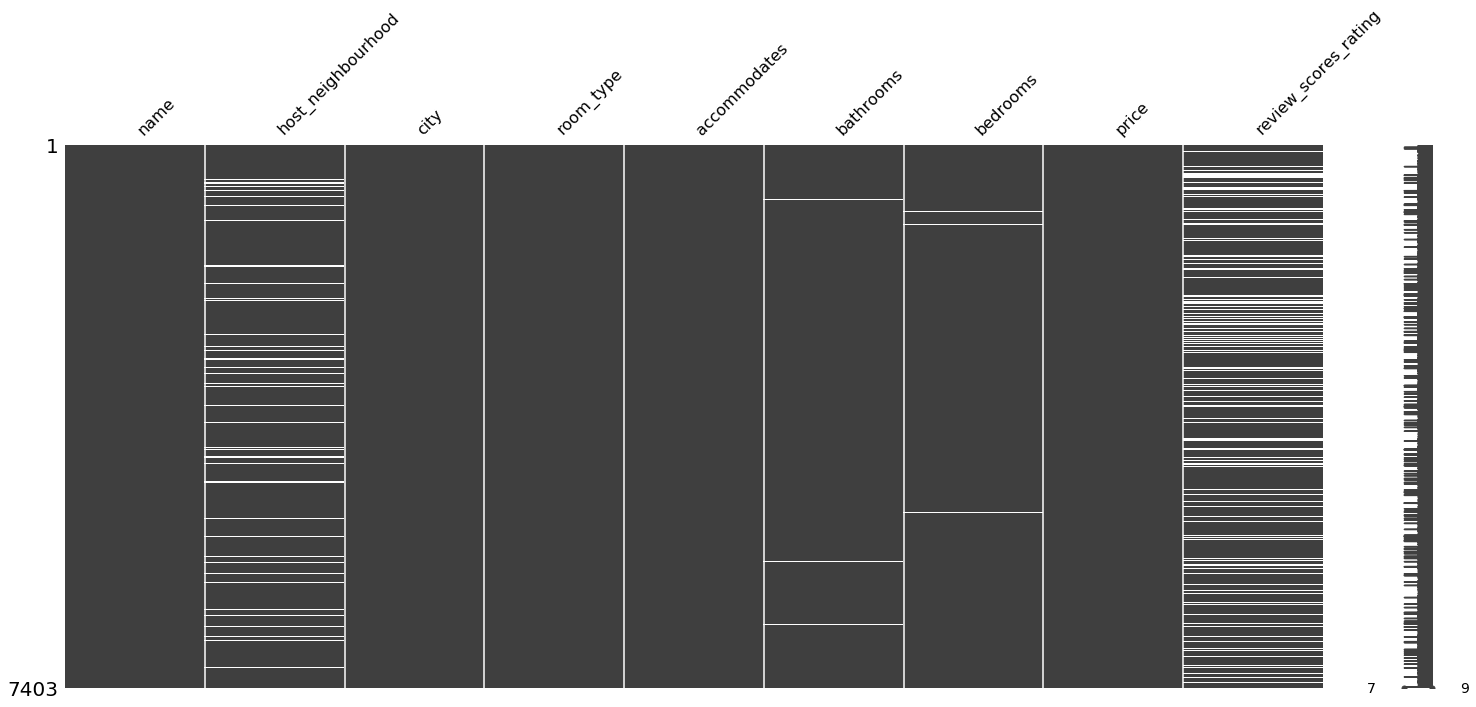

In [12]:
import missingno as msno

msno.matrix(full_data)

##### We see that we are missing quite a bit of data in host_neighborhood and review_scores_rating

##### For number of bathrooms and bedrooms, we only have a few missing values, so we wouldn't lose data if we dropped these values

##### For host_neighborhood, we can categorically encode them as having missing values, this will be dealt later on

##### Finally, review_score_rating is a rating that is based of a 100. I don't think it's a good idea to replace it with mean/median but we can create a new columns based off whether there are missing data on this column instead

In [13]:
full_data.shape[0] - full_data.review_scores_rating.isna().sum()

5943

### Correlation Matrix

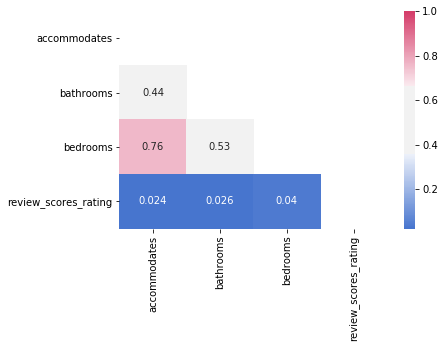

In [14]:
corr = full_data.dropna().corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, cmap=sns.diverging_palette(256, 0, sep=80, n = 7, as_cmap =True), annot = True, mask = mask)

### Data Types

##### One might notice that we need to change price from object to float. This is primarily due to the fact that it's in the dollar + decimals format

In [15]:
full_data.dtypes

name                     object
host_neighbourhood       object
city                     object
room_type                object
accommodates              int64
bathrooms               float64
bedrooms                float64
price                    object
review_scores_rating    float64
dtype: object

In [16]:
from re import sub
from decimal import Decimal

money = '$6,150,593.22'
value = Decimal(sub(r'[^\d.]', '', money))

def money_to_float(currency):
    return float(Decimal(sub(r'[^\d.]', '', currency)))

In [17]:
boston_data.price = boston_data.price.apply(money_to_float)

In [18]:
seattle_data.price = seattle_data.price.apply(money_to_float)

In [19]:
full_data.price = full_data.price.apply(money_to_float)

### Categorical Data

##### There are only three categorical data that we care about (and makes sense). This is host_neigborhood, room_type and city

In [20]:
full_data.dtypes

name                     object
host_neighbourhood       object
city                     object
room_type                object
accommodates              int64
bathrooms               float64
bedrooms                float64
price                   float64
review_scores_rating    float64
dtype: object

In [21]:
#Pull a list of the column names of the categorical variables
cat_cols_lst = ['host_neighbourhood', 'city', 'room_type']

def create_dummy_df(df, cat_cols, dummy_na):
    '''
    INPUT:
    df - pandas dataframe with categorical variables you want to dummy
    cat_cols - list of strings that are associated with names of the categorical columns
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    
    OUTPUT:
    df - a new dataframe that has the following characteristics:
            1. contains all columns that were not specified as categorical
            2. removes all the original columns in cat_cols
            3. dummy columns for each of the categorical columns in cat_cols
            4. if dummy_na is True - it also contains dummy columns for the NaN values
            5. Use a prefix of the column name with an underscore (_) for separating 
    '''
    for col in  cat_cols:
        try:
            # for each cat add dummy var, drop original column
            df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=dummy_na)], axis=1)
        except:
            continue
    return df

In [22]:
cleaned_data = create_dummy_df(full_data, cat_cols_lst, True)

In [23]:
cleaned_data.head()

,name,accommodates,bathrooms,bedrooms,price,review_scores_rating,host_neighbourhood_Allston-Brighton,host_neighbourhood_Anaheim,host_neighbourhood_Arbor Heights,host_neighbourhood_Atlantic,...,city_boston,"city_dorchester, boston",city_east Boston,city_seattle,city_波士顿,city_西雅图,city_nan,room_type_Private room,room_type_Shared room,room_type_nan
0,Sunny Bungalow in the City,4,1.5,2.0,250.0,NaN,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Charming room in pet friendly apt,2,1.0,1.0,65.0,94.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,Mexican Folk Art Haven in Boston,2,1.0,1.0,65.0,98.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,Spacious Sunny Bedroom Suite in Historic Home,4,1.0,1.0,75.0,100.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,Come Home to Boston,2,1.5,1.0,79.0,99.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


### Outliers

#### The next thng we should do is check for outliers for the price variables


#### I will use the IQR method, where we find Q1 and Q3 and remove any values that lies outside of that

In [24]:
Q1_boston = np.percentile(boston_data['price'], 25, interpolation = 'midpoint')
Q3_boston = np.percentile(boston_data['price'], 75, interpolation = 'midpoint')

In [25]:
boston_data_no = boston_data[(boston_data['price'] > Q1_boston) & (boston_data['price'] < Q3_boston)]

In [26]:
Q1_seattle = np.percentile(seattle_data['price'], 25, interpolation = 'midpoint')
Q3_seattle = np.percentile(seattle_data['price'], 75, interpolation = 'midpoint')

In [27]:
seattle_data_no = seattle_data[(seattle_data['price'] > Q1_seattle) & (seattle_data['price'] < Q3_seattle)]

In [28]:
Q1 = np.percentile(full_data['price'], 25, interpolation = 'midpoint')
Q3 = np.percentile(full_data['price'], 75, interpolation = 'midpoint')

In [29]:
full_data_no_outlier = full_data[(full_data['price'] > Q1) & (full_data['price'] < Q3)]

### Visualization 

##### Here are some of the questions that I wanted to ask and find out

In [30]:
np.arange(0,500,100)

array([  0, 100, 200, 300, 400])

Text(0.5, 1.0, 'Distirbution of Price in the Boston Airbnb dataset')

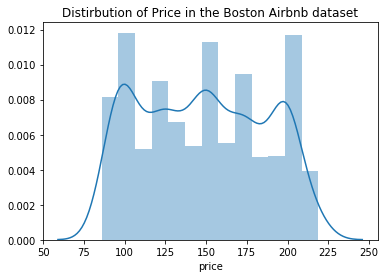

In [31]:
ax = sns.distplot(boston_data_no['price'])
ax.set_title('Distirbution of Price in the Boston Airbnb dataset')

Text(0.5, 1.0, 'Distirbution of Price in the Seattle Airbnb dataset')

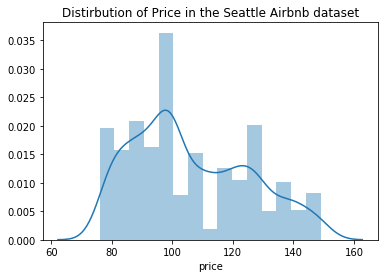

In [32]:
ax = sns.distplot(seattle_data_no['price'])
ax.set_title('Distirbution of Price in the Seattle Airbnb dataset')

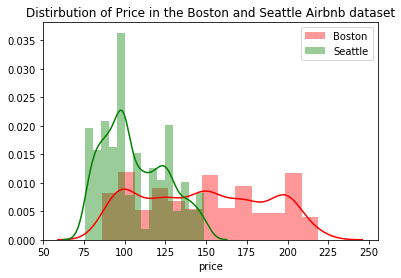

In [33]:
ax = sns.distplot(boston_data_no['price'], color = 'red', label="Boston")
ax = sns.distplot(seattle_data_no['price'], color = 'green', label="Seattle")
ax.set_title('Distirbution of Price in the Boston and Seattle Airbnb dataset')
ax.legend()

### Building a Linear Regression Model

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
full_data_no_outlier.dtypes

name                     object
host_neighbourhood       object
city                     object
room_type                object
accommodates              int64
bathrooms               float64
bedrooms                float64
price                   float64
review_scores_rating    float64
dtype: object

In [36]:
X = ['city', 'room_type','accommodates','bathrooms','bedrooms','review_scores_rating']
Y = ['price']

In [37]:
#Create a copy of the dataframe
full_data_no_copy = full_data_no_outlier.copy()
full_data_no_copy = full_data_no_copy[X]
full_data_y = full_data_no_outlier[Y]
#Pull a list of the column names of the categorical variables

def create_dummy_df(df, cat_cols, dummy_na):
    '''
    INPUT:
    df - pandas dataframe with categorical variables you want to dummy
    cat_cols - list of strings that are associated with names of the categorical columns
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    
    OUTPUT:
    df - a new dataframe that has the following characteristics:
            1. contains all columns that were not specified as categorical
            2. removes all the original columns in cat_cols
            3. dummy columns for each of the categorical columns in cat_cols
            4. if dummy_na is True - it also contains dummy columns for the NaN values
            5. Use a prefix of the column name with an underscore (_) for separating 
    '''
    for col in  cat_cols:
        try:
            # for each cat add dummy var, drop original column
            df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=dummy_na)], axis=1)
        except:
            continue
    return df

In [38]:
full_data_cleaned = create_dummy_df(full_data_no_copy, X, True)

#### Splitting into training and testing


In [39]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(
     full_data_cleaned, full_data_y, test_size=0.33, random_state=42)

#### Defining model

In [40]:
lin_model = LinearRegression()

In [41]:
lin_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Making predictions

In [42]:
predictions = lin_model.predict(X_test)

#### Calculating Error

In [75]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, predictions)

1.656251421938674e+26

### Using Ridge Regression

In [77]:
from sklearn.linear_model import Ridge

ridgeRegression = Ridge()

In [78]:
ridgeRegression.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [85]:
predictions_r = ridgeRegression.predict(X_test)

In [86]:

mean_squared_error(y_test, predictions_r)

732.6137982951672

### Our model can be seen to do so much better using ridge than Linear